In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%pylab inline

# Load the data from the .csv
# df is used to inspect the dataset
df = pd.read_csv('data/titanic-data.csv')
# titanic_df contains the cleaned data
titanic_df = pd.read_csv('data/titanic-data.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Table Descritption

Explanation of the variables from the dataset:

- PassengerId
- Survived: 0 = No, 1 = Yes
- Pclass (ticket class and proxy for SES): 1 = 1st, 2 = 2nd, 3 = 3rd
- Name
- Sex: male, female
- Age (age in years)
- SibSp (# of siblings / spouses aboard)
- Parch (# of parents / children aboard)
- Ticket (ticket number)
- Fare (passenger fare in USD)
- Cabin (cabin number)
- Embarked (port of embarcation): C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## A Question Worth Answering

After a first glimpse at the data available, *"the question"* to be answered would be this:

**Was there a factor or combination of factors that contributed to the survival of the tragedy?**

Of course the answer to this question won't be revealed by a single query, but multiple explorations to the dataset. For example:

- Proportionally, there were more men or women who survived?
- Was there a relation between the class you were travelling in and the chances of survival of the tragedy?
- Was there a different male / female ratio in the different classes? Did that impact your chances of survival?
- Was there an age cohort with higher chances of survival?
- Did people with parents or children aboard allowed first in the rescue boats, as the popular literature suggests, and therefore, had a better shot at surviving?
- Finally, is there a "magic formula" or combination of circumstances that almost guaranteed your way out of the tragedy?

The project will focus on answering all of these questions, but always through the lens of the factors that contributed to the survival of the tragedy.

## Data Wrangling

Before diving into the question, the dataset will be analyzed in order to spot anomalies related to the validity, accuracy or completeness of the data, and if possible, wrangle and fix such problems.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We will check the dataset column by column, looking for inconsistencies across the board.

* PassengerId: there are 891 non-null entries, ranging from 0 to 891, since every entry is a unique ID, looks good.
* Survived: there are 891 non-null entries, ranging from 0 to 1, since it is a binary validatior, looks good.
* PClass: there are 891 non-null entries, ranging from 1 to 3, for 1st, 2nd and 3rd class, looks good.
* Name & Ticket: there are 891 non-null entries, overall looks good, but we won't be looking at those fields either, since we can't extract valuable information for the study.
* Age: there are 714 non-null entries, ranging from 0.42 to 80. Here there are several problems.
    * There are 177 null entries.
    * There are under 1 entries, which makes no sense since age should be an integer.
* Sex: there are 891 non-null entries, but still need to look if there are values that are not male or female.
* SibSp & Parch: there are 891 non-null entries, in a reasonalble range 1 to 8, looks good.
* Fare: there are 891 non-null entries, in a reasonalble range 0 to 512, looks good.
    * Interestingly, there are entries with price 0. It is not concerning for the final outcome of the study, but we will look at those anyway since it is curios.
* Cabin: there are 204 non-null entries.
    * There are 687 null entries. But it is also not concerning since it is just an internal reference number that we won't be using for this study.
* Embarked: there are 889 non-null entries.
    * There are 8 entries more than rows.

### Fixing Age

In [5]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


The dataset is composed of 891 entries, but `Age` only has 714. Which means there must be missing records in this column.

The search below looks for entries with non numeric values for the `Age` column, and indeed, there are 177 records that have no age numeric value.

After a closer look, there is clearly a completeness problem, but without any impact in adjacent fields or data corruption. Meaning that the `NaN` records do not carry on more problems across the row.

In such cases, there are two valid options: either delete those rows or replace the `NaN` with new estimates such as the mean or median.

In this case, we will be calculating the median for each `Pclass` and `Sex` and use it as a proxy to fill the missing values. We will use the median since it is usually a safer predictor, protecting us from potential outliers.

In [6]:
cols = ['male', 'female']
median_ages = pd.DataFrame(data=[], index=range(1,4), columns=cols)

# Create a DF with the median for each Pclass and Sex
for i in range(1,4):
    for j in cols:
        median_ages.loc[i][j] = df[(df['Pclass'] == i) & (df['Sex'] == j)]['Age'].dropna().median()

# Checks for NaNs across the DF and replaces them with the medians found above
for i in range(1,4):
    for j in cols:
        titanic_df.loc[(titanic_df.Age.isnull()) & (titanic_df.Pclass == i) & (titanic_df.Sex == j), 'Age'] = median_ages.loc[i][j]

# Now we want this operation to return an empty DataFrame.
titanic_df[titanic_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


On the other hand, there are values that have values under 1, which doesn't make much sense from an age perspective. We will replace these with age 1.

In [7]:
df[df['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [8]:
def condition(value):
    if value < 1.0:
        return 1.0
    return value

titanic_df['Age'] = titanic_df['Age'].apply(condition)

# We want now this to return an empty DataFrame.
titanic_df[titanic_df['Age'] < 1.0].shape[0]

0

### Checking Sex

In [9]:
# Are there any values that are not male or female?
# We want this to return an empty DataFrame.
n_rows = df.shape[0]
n_cols = df.shape[1]
expected = ["male", "female"]

df.loc[~df['Sex'].isin(expected)].shape[0]

0

The function above demonstrates that all the `Sex` data entries are consistent and follow a valid pattern.

### How many survived?

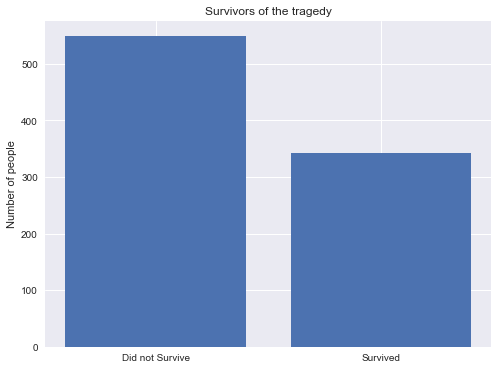

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Survived
0    61.616162
1    38.383838
Name: PassengerId, dtype: float64


In [10]:
"""
Create a new set segmented by survivors and plot it in a bar chart.
Use Apply to with a lambda function to get the percentages.
"""

survived = titanic_df.groupby(['Survived']).count()['PassengerId']
survived_pct = survived.groupby(level=0).apply(lambda x: 100 * x / titanic_df['PassengerId'].count())

fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(1,1,1)
ax1.bar(range(len(survived)), survived)
ax1.set(title="Survivors of the tragedy", xlabel="", ylabel="Number of people")
ax1.set_xticks(range(len([0,1])))
ax1.set_xticklabels(('Did not Survive', 'Survived'))

plt.show()
               
print survived
print ""
print survived_pct

Before even start diving into the problem, the most obvious question to be answered is how many passengers (from the dataset) survived the tragedy, regardless their age, sex, type of cabin or anything else.

Out of 891 passengers:

* Did not survive: **549 (61.62%)**
* Survived: **342 (38.38%)**

### Female / Male distribution

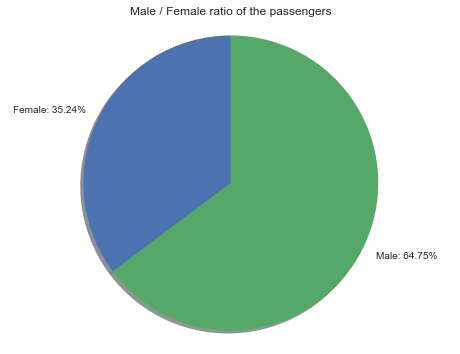

Sex
female    314
male      577
Name: PassengerId, dtype: int64


In [11]:
"""
Create a new set segmented by sex and plots it in a pie chart.
"""

passengers_by_sex = titanic_df.groupby(['Sex']).count()['PassengerId']
passengers_by_sex_pct = passengers_by_sex.groupby(level=0).apply(lambda x: 100 * x / titanic_df['PassengerId'].count())

fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(1,1,1)
ax1.set(title="Male / Female ratio of the passengers")
labels = 'Female: 35.24%', 'Male: 64.75%'
sizes = passengers_by_sex_pct
ax1.pie(sizes, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.show()

print passengers_by_sex

The dataset collects records from 891 passengers, here's the female / male distribution among the passengers:

* Female: **314 (35.24%)**
* Male: **577 (64.75%)**

### Survivors, by Gender

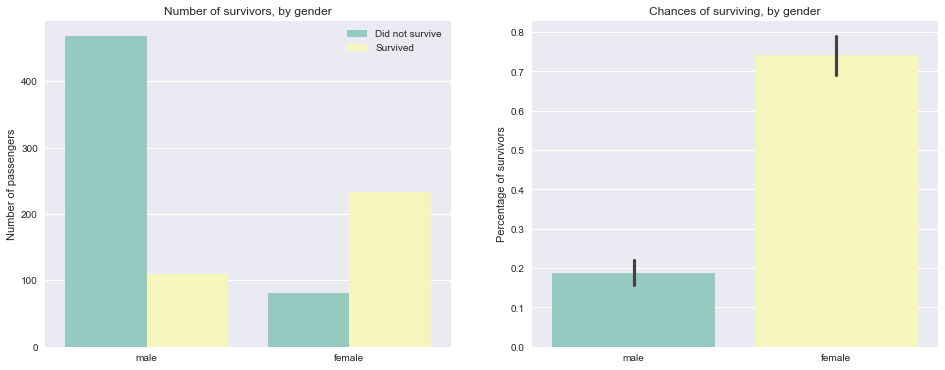

In [12]:
'''
Count the survivors, segmented by sex.
Use SNS to display the total and % of survivors, segmented by sex.
'''
male_survived = titanic_df[titanic_df.Sex == "male"]["Survived"]
female_survived = titanic_df[titanic_df.Sex == "female"]["Survived"]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

sns.countplot(x="Sex", hue="Survived", palette="Set3", data=titanic_df, ax=ax1)
ax1.set_title("Number of survivors, by gender")
ax1.set_xlabel("")
ax1.set_ylabel("Number of passengers")
ax1.legend(labels=['Did not survive', 'Survived'])

sns.barplot(x="Sex", y="Survived", palette="Set3", data=titanic_df, ax=ax2)
ax2.set_title("Chances of surviving, by gender")
ax2.set_xlabel("")
ax2.set_ylabel("Percentage of survivors")

plt.show()

Interestingly enough, proportionally (but also in absoulte terms, regardless there were less women abroad) way more women survived than men did:

* Women: 314 (35.24% out of the total passengers, as seen in the previous figure)
    * Survived: **233 (74.21%)**
    * Did not survive: 81 (25.79%)
  
  
* Men: 577 (64.75% out of the total passengers, as seen in the previous figure)
    * Survived: **109 (18.89%)**
    * Did not survive: 468 (81.11%)
    
Without still a proper reasoning, it is fascinating to observe that being a women gave you way more chances to survive the tragedy. **Almost 3 out of 4 women could make it, comparing to men, whom not even 2 out of 5 survived.**

### Survivors, by Gender and Pclass

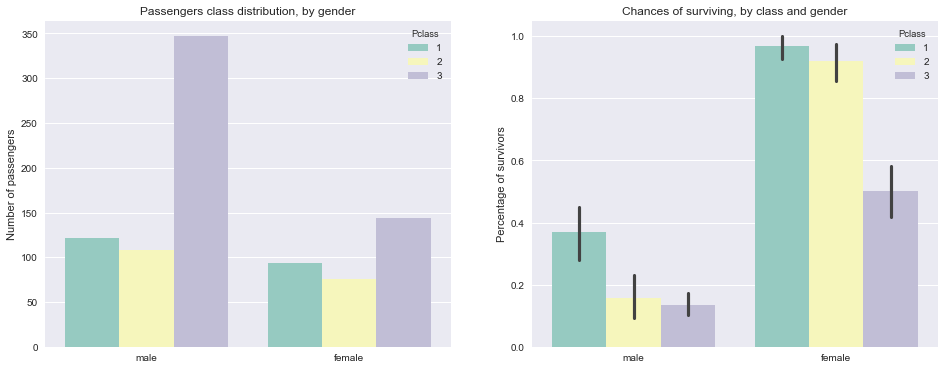

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [13]:
"""
Group the information by Sex and Pclass.
Then display in SNS the total passengers in each class
and only the ones who survived.
"""

pclass_total = titanic_df.groupby(['Sex', 'Pclass']).count()['Survived']
pclass_survived = titanic_df.groupby(['Sex', 'Pclass']).sum()['Survived']

pct_pclass = pclass_survived / pclass_total

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

sns.countplot(x="Sex", hue="Pclass", palette="Set3", data=titanic_df, ax=ax1)
ax1.set_title("Passengers class distribution, by gender")
ax1.set_xlabel("")
ax1.set_ylabel("Number of passengers")

sns.barplot(x="Sex", y="Survived", hue="Pclass", palette="Set3", data=titanic_df, ax=ax2)
ax2.set_title("Chances of surviving, by class and gender")
ax2.set_xlabel("")
ax2.set_ylabel("Percentage of survivors")

plt.show()

print pclass_total
print ""
print pct_pclass

Not only being a women affected your chances of survival, but if on top of that, as a woman you were travelling in 1st or 2nd class, you were close to guaranteed to make it through. As the previous results show, almost 97% of the women in 1st class and 92.1% in 2nd class survived, whereas from the ones travelling in 3rd class "only" 50% were saved.

But being a men made things way worse: despite the survival chances by being in 1st class were more than double than the ones at 2nd and 3rd, they were still lover than women in 3rd class.

**In other words, from what we know, when it came to survive the tragedy, being a woman was important, but being a rich woman, almost granted you way out of the tragedy.**

Another interesting insight from the data above is the amount of men travelling in 3rd class compared to women. Despite in absolute terms there were less women than men abroad, the ratio of women across the classes is almost balanced. But in terms of men, there's over three times more people travelling in 3rd class, compared to 1st and 2nd.

**Men were populating almost the entire 3rd class cabins, the segment with lowest chances of survival and a higher mortality, both in terms of percentage and total count.**

### Survivors, by Age

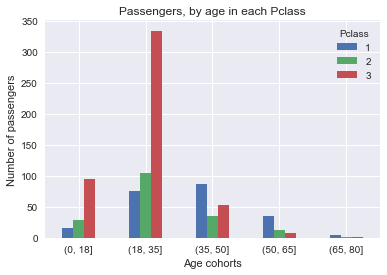

In [14]:
"""
Group the passengers in age buckets, delimited by preselected bins.
Then display with the DataFrame's plot built-in function
the total passengers in each class, by age cohort.
"""

bins = [0, 18, 35, 50, 65, 80]
passengers_by_age = titanic_df.groupby(['Pclass', pd.cut(titanic_df.Age, bins)])
age_by_pclass = passengers_by_age.size().unstack()

age_by_pclass1 = age_by_pclass.iloc[0]
age_by_pclass2 = age_by_pclass.iloc[1]
age_by_pclass3 = age_by_pclass.iloc[2]

age_by_pclass_t = age_by_pclass.transpose()
ax = age_by_pclass_t.plot.bar(title="Passengers, by age in each Pclass", xticks=[])
ax.set_xlabel("Age cohorts")
ax.set_ylabel("Number of passengers")

plt.show()

Before diving in the survivors, this plot gives a better sensibility of how people how distributed according to their age. It is a good indicator that increases in age correlate with higher standards when it comes to travel (i.e. 1st and 2nd class).

For example, among cohorts of 35 years old or more, the prevailing class is the 1st class, while among younger folks (which is also the largest group) the most common cabin is 3rd class.

This reveals two important things: **first, the majority of passengers belonged to the 18 - 35 cohort, and second, that it is more likely to see passengers above 35 years old occupy 1st and 2nd class seats.** Which shouldn't surprise us, since seniority usually comes in hand with accumulation of wealth.

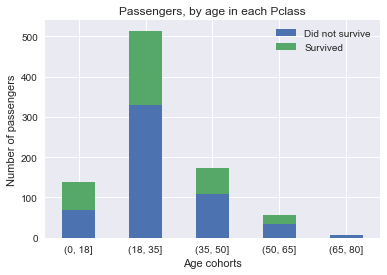

Survived    0    1
Age               
(0, 18]    69   70
(18, 35]  330  184
(35, 50]  108   66
(50, 65]   35   21
(65, 80]    7    1


In [15]:
"""
Group the passengers in age buckets, delimited by preselected bins.
Then display with the DataFrame's plot built-in function
if they survived, segmented by age cohort in a stacked bar.
"""

bins = [0, 18, 35, 50, 65, 80]
passengers_by_age = titanic_df.groupby(['Survived', pd.cut(titanic_df.Age, bins)])
survived_by_age = passengers_by_age.size().unstack()

survived_by_age_t = survived_by_age.transpose()
ax = survived_by_age_t.plot.bar(stacked=True, title="Passengers, by age in each Pclass", xticks=[])
ax.set_xlabel("Age cohorts")
ax.set_ylabel("Number of passengers")
ax.legend(['Did not survive', 'Survived'])

plt.show()
print survived_by_age_t

This graph ties together a couple of trends seen in previous figures.

For one, elder cohorts tended to travel in better classes as their age increased. Therefore a small percentage of passengers between 18 and 35 travelled in 1st class, but majority of passengers above 50 travelled in 1st and 2nd class.

But prior to that, we've seen that women travelling in 1st and 2nd class, had almost double chances of surviving, compared to the ones travelling in 3rd class.

But here comes the interesting part: regardless if you were men or women, the chances of survival remained the same (around 40%) across different ages cohorts. Only increasing for kids, and dramatically decreasing for the eldest.

**Therefore, despite the largest cohort of people (between 18 and 35) were travelling mostly in 3rd class, they were among the ones who got the most survivors. Along those lines, also kids (18 or less), whom most of them were travelling in 3rd class, got the highest rate of survival, over 50%.**

### Diving deeper in an age range

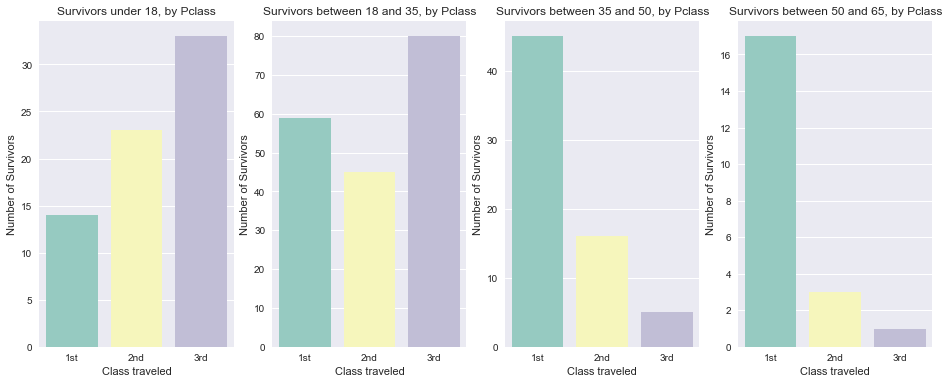

In [16]:
"""
Filter the Pclass data on an age basis and regroup these arrays in a new DF.
Then display the survivors by Pclass for each age cohort.
"""

range_18 = []
range_18_35 = []
range_35_50 = []
range_50_65 = []
range_65 = []

for index, row in titanic_df.iterrows():
    if (row['Age'] <= 18) & (row['Survived'] == 1):
        range_18.append(row["Pclass"])
    elif (18 < row['Age'] <= 35) & (row['Survived'] == 1):
        range_18_35.append(row["Pclass"])
    elif (35 < row['Age'] <= 50) & (row['Survived'] == 1):
        range_35_50.append(row["Pclass"])
    elif (50 < row['Age'] <= 65) & (row['Survived'] == 1):
        range_50_65.append(row["Pclass"])
    elif (row['Age'] >= 65) & (row['Survived'] == 1):
        range_65.append(row["Pclass"])

age_df = pd.DataFrame(
    data=[range_18,
          range_18_35,
          range_35_50,
          range_50_65,
          range_65],
    index=['under18', '18to35', '35to50', '50to65', 'over65'])

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6), sharex=False)

sns.countplot(x="under18", palette="Set3", data=age_df.transpose(), ax=ax1)
ax1.set_title("Survivors under 18, by Pclass")
ax1.set_xlabel("Class traveled")
ax1.set_ylabel("Number of Survivors")
ax1.set(xticklabels=["1st","2nd","3rd"])

sns.countplot(x="18to35", palette="Set3", data=age_df.transpose(), ax=ax2)
ax2.set_title("Survivors between 18 and 35, by Pclass")
ax2.set_xlabel("Class traveled")
ax2.set_ylabel("Number of Survivors")
ax2.set(xticklabels=["1st","2nd","3rd"])

sns.countplot(x="35to50", palette="Set3", data=age_df.transpose(), ax=ax3)
ax3.set_title("Survivors between 35 and 50, by Pclass")
ax3.set_xlabel("Class traveled")
ax3.set_ylabel("Number of Survivors")
ax3.set(xticklabels=["1st","2nd","3rd"])

sns.countplot(x="50to65", palette="Set3", data=age_df.transpose(), ax=ax4)
ax4.set_title("Survivors between 50 and 65, by Pclass")
ax4.set_xlabel("Class traveled")
ax4.set_ylabel("Number of Survivors")
ax4.set(xticklabels=["1st","2nd","3rd"])

# sns.countplot(x="over65", palette="Set3", data=age_df.transpose(), ax=ax5)
# ax5.set_title("Survivors over 65, by Pclass")
# ax5.set_xlabel("Class traveled")
# ax5.set_ylabel("")

plt.show()

There was an interesting insight from the last graphic: the number of survivors in the age cohorts (35 to 50) and (50 to 65) was really similar to the number of people travelling in 1st and 2nd class for those respective cohorts.

That led to the possibility that among those age cohorts, the ones that got out first were the passengers travelling in 1st and 2nd class.

The graph above proves exactly that: **among age cohorts (35 to 50) and (50 to 65), almost all survivors came from 1st and 2nd class, and really few people from that age range (only 6 out of 209), survived from the 3rd class.**

Then the large bulk of survivors comes from the 18 to 50 cohorts, travelling in 1st and 2nd class. Therefore we can assume (as we've already seen in "Survivors, by Gender and Pclass") that 1st and 2nd class passengers had a better shot of survival compared to the folks at 3rd class.

Finally, despite not showing in the plot above, from the 8 passengers abroad over 65 years old, only one could make it: a first class passenger. Being the cohort over 65 among the ones with lower chances of survival.

### Family abroad

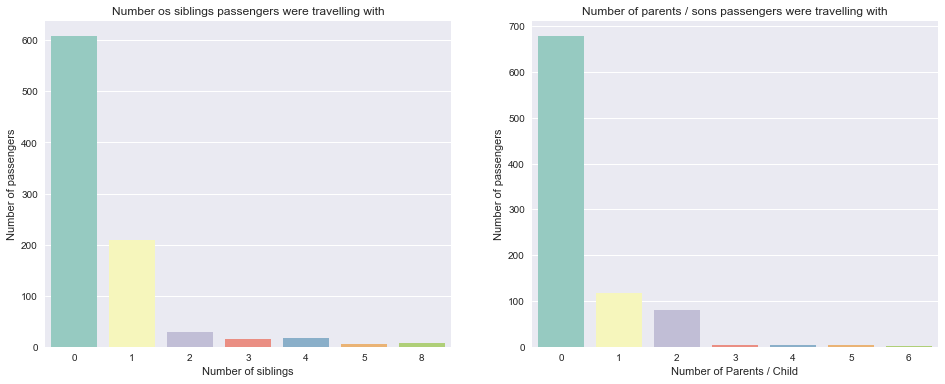

In [17]:
"""
Group the dataset by the number of siblings and parents abroad.
Then display in SNS the total passengers in each cohort.
"""

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

sns.countplot(x="SibSp", palette="Set3", data=titanic_df, ax=ax1)
ax1.set_title("Number os siblings passengers were travelling with")
ax1.set_xlabel("Number of siblings")
ax1.set_ylabel("Number of passengers")

sns.countplot(x="Parch", palette="Set3", data=titanic_df, ax=ax2)
ax2.set_title("Number of parents / sons passengers were travelling with")
ax2.set_ylabel("Number of passengers")
ax2.set_xlabel("Number of Parents / Child")

plt.show()

From the figure above, almost all people travelled alone in terms of family. Almost all passengers had 0 or 1 sibling / parent / son abroad, and marginally brought more than two.

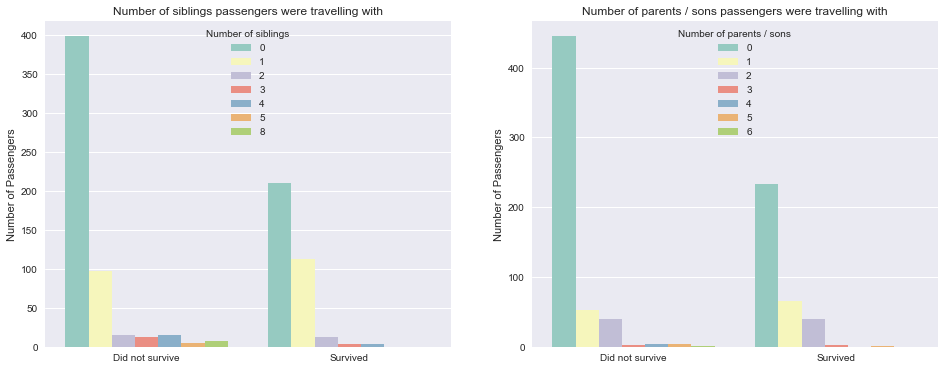

In [18]:
"""
Group the dataset by the number of siblings and parents abroad.
Then display in SNS if they survived or not.
"""

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

sns.countplot(x="Survived", hue="SibSp", palette="Set3", data=titanic_df, ax=ax1)
ax1.set_title("Number of siblings passengers were travelling with")
ax1.set_ylabel("Number of Passengers")
ax1.set_xlabel("")
ax1.set(xticklabels=["Did not survive","Survived"])
ax1.legend(title="Number of siblings")

sns.countplot(x="Survived", hue="Parch", palette="Set3", data=titanic_df, ax=ax2)
ax2.set_title("Number of parents / sons passengers were travelling with")
ax2.set_ylabel("Number of Passengers")
ax2.set_xlabel("")
ax2.set(xticklabels=["Did not survive","Survived"])
ax2.legend(title="Number of parents / sons")

plt.show()

Similarly than the last figure, there seems to be no difference when it came to having siblings or parents / sons abroad, since there's no clear cut in the ratio of survivors in each group.


## Conclusion

After studying the dataset in depth, we can safely conclude there were several factors that contributed to the survival of the tragedy. Therefore some circumstances seemed to play a huge role and put you in a better position when it came to survive.

To begin with, there were 891 passengers abroad, from those:
- Did not survive: 549 (61.62%)
- Survived: 342 (38.38%)

Out of the 342 who survived:
- 68.13% were women
- 31.87% were men

Which not only tells us that women had a higher chance of survival, but even more, if we put these numbers in a more global perspective:

There were 314 women abroad (35.24% out of the total passengers)
- Survived: 233 (74.21%)
- Did not survive: 81 (25.79%)

There were 577 men abroad (64.75% out of the total passengers)
- Survived: 109 (18.89%)
- Did not survive: 468 (81.11%)

So it is not just that more women survived in absolute numbers, but percentage wise, the difference is huge.

But things get even more interesting when we start digging into the travelling preferences. Here's the breakdown of chances of survival for men and women segmented by the class they were travelling.

Women
- 1st 96.80%
- 2nd 92.10%
- 3rd 50.00%
Men
- 1st 36.88%
- 2nd 15.74%
- 3rd 13.54%

If being a woman was important, being a rich woman, almost granted you way out of the tragedy. Therefore gender played a huge role when it came to the survival.

When we broke the dataset by age, it revealed two things:

- First, the majority of passengers belonged to the 18 - 35 cohort
- Second, that it was more likely to see passengers above 35 occupy 1st and 2nd class seats.

Logically, what derives from the first bullet is that despite the largest cohort of people (18 - 35) were travelling mostly in 3rd class, they were among the ones who got the most survivors in absolute numbers.

But overall, despite the disparity of age ranges, the survival rate across those cohorts remained the same except for the kids (higher) and the eldest (lower).

Finally, the breakdown by age and Pclass, revealed that among age cohorts (35 - 50) and (50 - 65), almost all survivors came from 1st and 2nd class, and really few people from that age range (only 6 out of 209), survived from the 3rd class.

But shying away from the pure statistical results derived from the dataset, there is a broader point to be discussed about the limitation of the dataset itself.

First of all, the number of passengers abroad in the moment of the accident ranges from 3,327 to 3,547, depending on the sources. Therefore we do have limited data in hand and drawing conclusions from such small set might point to misleading causes.

On top of that, we do lack age records from a large portion of the dataset, which we have inferred from the median for cohorts across the same Pclass and Sex. Despite it is a good indicator, is not as reliable as having the complete data and can be prone to errors in our conclusions.

Some additional data might also had come in handy for the study. For example, the distance between the cabin and a rescue boats is definitely a great link we couldn't explore. For one because the data was not provided, but also because almost all cabin data is missing (only 204 non-null values out of 891).

Related to that, the deck where the cabin was located could have been a great datapoint we could have used to predict which heights of the ship were the most safe.

In a nutshell, and with the data in hand, the factors that helped surviving the tragedy were: first of all being a women, then if possible, travel in 1st or 2nd class, and finally, age between 35 and 50 years old.